In [1]:
from __future__ import print_function, division

# %matplotlib inline
# %precision 3

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from marriages_replication import *

# from matplotlib import rc
# rc('animation', html='html5')

In [2]:
def runSimBi(agents_per_race, races, prob_intra, prob_inter):
    agents = agents_per_race*races
    genders=getGender(agents_per_race,races)
    social_beliefs, political_beliefs = createPersonality(agents_per_race, races)
    adj, adj2, adj3 = createAdj(agents_per_race, races, prob_inter=prob_inter, prob_intra=prob_intra)
    distances = getPersonalityDistances(agents, adj, genders, social_beliefs, political_beliefs, bisexuals=True)
    marriage, distances = createMarriages(agents, distances,genders)
    avg_dist = averageDistances(distances, marriage)
    num_intra = numIntraracial(marriage, agents_per_race, races)
    num_inter = numInterracial(num_intra, marriage)
    diversity,percent_married,compatibility = welfareRatios(num_intra, num_inter, marriage, races, agents_per_race, avg_dist)
    return diversity,percent_married,compatibility

[ 0.          0.07142857  0.14285714  0.21428571  0.28571429  0.35714286
  0.42857143  0.5         0.57142857  0.64285714  0.71428571  0.78571429
  0.85714286  0.92857143  1.        ]


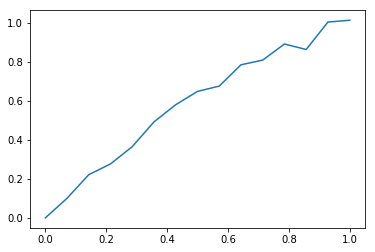

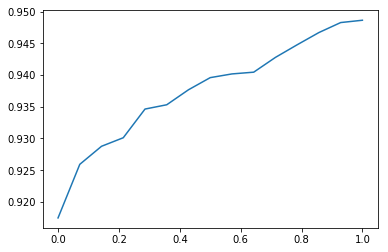

In [3]:

probabilities = np.linspace(0.0, 1.0, num=15, dtype=float)
num_sims = 30
print(probabilities)

diversities = []
strengths = []

for prob_interracial in probabilities:
    div_sum = 0.0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength = runSimBi(50, 2, 1.0, prob_interracial)
        div_sum += div
        str_sum += strength
    diversities.append(div_sum/num_sims)
    strengths.append(str_sum/num_sims)

plt.figure()
plt.plot(probabilities, diversities, label='diversities')
plt.figure()
plt.plot(probabilities, strengths, label='strengths')
plt.show()

Design considerations:

* How to represent sexuality
    * hard "gay" "straight" "bisexual" or a spectrum
* Can you point to people who will never be atracted to you
* How gender representation changes
* 

Other things:

* \# of times to run the simulation
* number of races
* number of people to represent life better

Allen Downey:
* just run the simulation a bunch and plot them all
* distributional differences of personality traits between men and women (or other groups)
* step 1: single community (no bipartite)
* step 2: give groups diff characteristics


In [4]:
def runSimDiffTraits(agents_per_race, races, prob_intra, prob_inter, mean_w, mean_m):
    agents = agents_per_race*races
    genders=getGender(agents_per_race,races)
    social_beliefs, political_beliefs = createPersonality(
        agents_per_race, races, gender_matrix=genders, mean_w=mean_w, mean_m=mean_m)
    adj, adj2, adj3 = createAdj(agents_per_race, races, prob_inter=prob_inter, prob_intra=prob_intra)
    distances = getPersonalityDistances(agents, adj, genders, social_beliefs, political_beliefs, bisexuals=True)
    marriage, distances = createMarriages(agents, distances,genders)
    avg_dist = averageDistances(distances, marriage)
    num_intra = numIntraracial(marriage, agents_per_race, races)
    num_inter = numInterracial(num_intra, marriage)
    diversity,percent_married,compatibility = welfareRatios(num_intra, num_inter, marriage, races, agents_per_race, avg_dist)
    mw, mm, ww = genderRatios(marriage, agents, genders)
    return diversity,percent_married,compatibility, mw, mm, ww

In [5]:
runSimDiffTraits(50, 2, 1.0, 0.4, 0.25, 0.75)

(0.56000000000000005, 1.0, 0.9559224126057615, 0, 50, 50)

[ 0.          0.03571429  0.07142857  0.10714286  0.14285714  0.17857143
  0.21428571  0.25        0.28571429  0.32142857  0.35714286  0.39285714
  0.42857143  0.46428571  0.5       ]


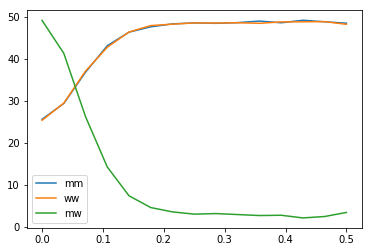

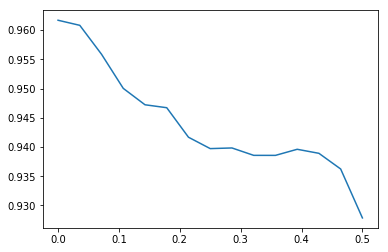

In [13]:
probabilities = np.linspace(0.0, 0.5, num=15, dtype=float)
num_sims = 30
print(probabilities)

mms = []
wws = []
mws = []
strengths = []

connection_prob = 0.4

for diff in probabilities:
    mm_sum = 0
    ww_sum = 0
    mw_sum = 0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength, mw, mm, ww = runSimDiffTraits(50, 2, connection_prob, connection_prob, 0.5-diff, 0.5+diff)
        mm_sum += mm
        ww_sum += ww
        mw_sum += mw
        str_sum += strength
    mms.append(mm_sum/num_sims)
    wws.append(ww_sum/num_sims)
    mws.append(mw_sum/num_sims)
    strengths.append(str_sum/num_sims)

mm_lab, = plt.plot(probabilities, mms, label='mm')
ww_lab, = plt.plot(probabilities, wws, label='ww')
mw_lab, = plt.plot(probabilities, mws, label='mw')
plt.legend(handles=[mm_lab, ww_lab, mw_lab])
plt.figure()
plt.plot(probabilities, strengths, label='strengths')
plt.show()